In [263]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime


In [264]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [265]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [266]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [267]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

466

In [268]:
url  = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city = "Kampala"

In [269]:
query_url = url + "&q=" +city

In [270]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [271]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [272]:
weather_json.get("main")

{'temp': 81.77,
 'feels_like': 77.23,
 'temp_min': 81.77,
 'temp_max': 81.77,
 'pressure': 1013,
 'humidity': 42,
 'sea_level': 1013,
 'grnd_level': 882}

In [273]:
weather_json.get("weather")

[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]

In [274]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
import json

In [275]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [276]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | river falls
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | namtsy
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | batagay-alyta
Processing Record 17 of Set 1 | hit
Processing Record 18 of Set 1 | port-cartier
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | vao
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | camacha
Processing Record 23 of Set 1 | ilebo
Processing Record 2

Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | mirnyy
Processing Record 45 of Set 4 | beloha
Processing Record 46 of Set 4 | lima duarte
Processing Record 47 of Set 4 | pahrump
Processing Record 48 of Set 4 | santa rosalia
Processing Record 49 of Set 4 | indramayu
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | hinton
Processing Record 2 of Set 5 | todos santos
Processing Record 3 of Set 5 | meulaboh
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | karauzyak
City not found. Skipping...
Processing Record 7 of Set 5 | olinda
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | cherskiy
Processing Record 10 of Set 5 | punto fijo
Processing Record 11 of Set 5 | le port
Processing Record 12 of Set 5 | lasa
Processing Record 13 of Set 5 | honiara
Processing Record 14 of Set 5 | wenling
Processing Record 15 of Set 5 | ebeltoft
Processin

Processing Record 31 of Set 8 | harper
Processing Record 32 of Set 8 | quelimane
Processing Record 33 of Set 8 | macamic
Processing Record 34 of Set 8 | ambon
Processing Record 35 of Set 8 | chimoio
Processing Record 36 of Set 8 | longlac
City not found. Skipping...
Processing Record 37 of Set 8 | kindu
Processing Record 38 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | carutapera
Processing Record 41 of Set 8 | kavaratti
Processing Record 42 of Set 8 | saint-georges
Processing Record 43 of Set 8 | soyo
Processing Record 44 of Set 8 | chapais
Processing Record 45 of Set 8 | taoudenni
Processing Record 46 of Set 8 | hualmay
Processing Record 47 of Set 8 | biltine
Processing Record 48 of Set 8 | ust-barguzin
Processing Record 49 of Set 8 | luanda
Processing Record 50 of Set 8 | moline
Processing Record 1 of Set 9 | honningsvag
Processing Record 2 of Set 9 | yelizovo
Processing Record 3 of Set 9 | gat
Processing 

In [277]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.57,150.80,82.27,79,29,9.46,PG,2020-08-02 10:22:34
1,Kruisfontein,-34.00,24.73,81.82,15,0,21.00,ZA,2020-08-02 10:22:34
2,Victoria,22.29,114.16,82.00,88,100,11.01,HK,2020-08-02 10:21:40
3,Albany,42.60,-73.97,73.00,92,100,3.15,US,2020-08-02 10:22:35
4,River Falls,44.86,-92.62,66.00,82,90,11.41,US,2020-08-02 10:20:48
...,...,...,...,...,...,...,...,...,...
427,Chicama,-7.84,-79.15,59.29,86,8,3.87,PE,2020-08-02 10:23:31
428,Aden,12.78,45.04,89.49,64,1,24.11,YE,2020-08-02 10:22:04
429,Vitim,59.45,112.56,75.85,39,0,13.04,RU,2020-08-02 10:23:32
430,Vila Do Maio,15.13,-23.22,82.40,78,75,10.29,CV,2020-08-02 10:23:32


In [278]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [279]:
organized_df = city_data_df[ ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] ]
organized_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavieng,PG,2020-08-02 10:22:34,-2.57,150.80,82.27,79,29,9.46
1,Kruisfontein,ZA,2020-08-02 10:22:34,-34.00,24.73,81.82,15,0,21.00
2,Victoria,HK,2020-08-02 10:21:40,22.29,114.16,82.00,88,100,11.01
3,Albany,US,2020-08-02 10:22:35,42.60,-73.97,73.00,92,100,3.15
4,River Falls,US,2020-08-02 10:20:48,44.86,-92.62,66.00,82,90,11.41


In [280]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
organized_df.to_csv(output_data_file, index_label="City_ID")

In [281]:
# Import the time module.
import time
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

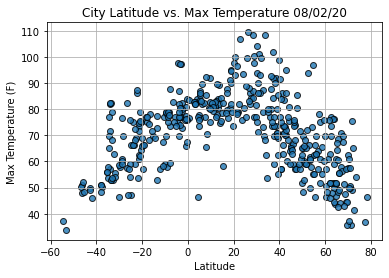

In [282]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

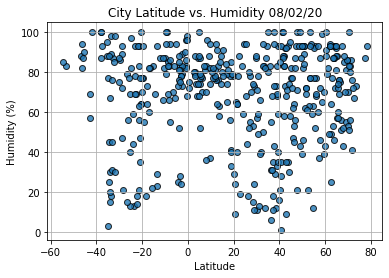

In [283]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

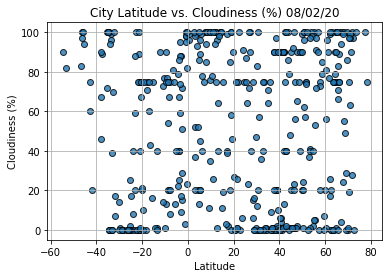

In [284]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

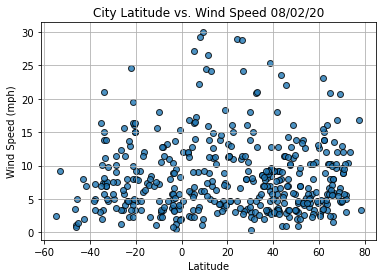

In [285]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [286]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [287]:
index13 = organized_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2020-08-02 10:20:48
Lat                        -33.93
Lng                         18.42
Max Temp                     71.6
Humidity                       30
Cloudiness                      0
Wind Speed                  14.99
Name: 13, dtype: object

In [288]:
northern_hemi_df = organized_df.loc[(organized_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Victoria,HK,2020-08-02 10:21:40,22.29,114.16,82.00,88,100,11.01
3,Albany,US,2020-08-02 10:22:35,42.60,-73.97,73.00,92,100,3.15
4,River Falls,US,2020-08-02 10:20:48,44.86,-92.62,66.00,82,90,11.41
5,Qaanaaq,GL,2020-08-02 10:22:35,77.48,-69.36,36.90,87,100,16.87
6,Upernavik,GL,2020-08-02 10:22:35,72.79,-56.15,41.38,67,0,10.33


In [289]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = organized_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = organized_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Victoria,HK,2020-08-02 10:21:40,22.29,114.16,82.00,88,100,11.01
3,Albany,US,2020-08-02 10:22:35,42.60,-73.97,73.00,92,100,3.15
4,River Falls,US,2020-08-02 10:20:48,44.86,-92.62,66.00,82,90,11.41
5,Qaanaaq,GL,2020-08-02 10:22:35,77.48,-69.36,36.90,87,100,16.87
6,Upernavik,GL,2020-08-02 10:22:35,72.79,-56.15,41.38,67,0,10.33
...,...,...,...,...,...,...,...,...,...
422,Zemio,CF,2020-08-02 10:23:31,5.03,25.14,75.96,88,100,5.28
424,Zyryanka,RU,2020-08-02 10:23:31,65.75,150.85,60.53,57,0,5.53
428,Aden,YE,2020-08-02 10:22:04,12.78,45.04,89.49,64,1,24.11
429,Vitim,RU,2020-08-02 10:23:32,59.45,112.56,75.85,39,0,13.04


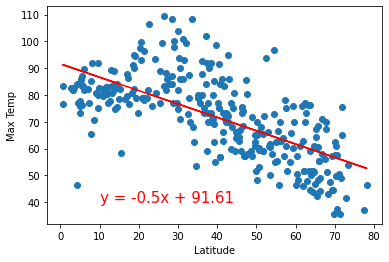

In [290]:
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(10,40))

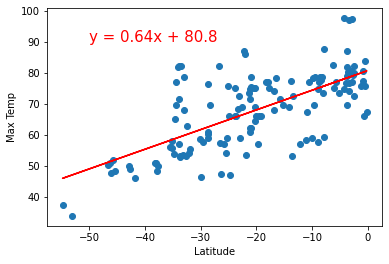

In [291]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n'
                        for 'Maximum Temperature''', 'Max Temp',(-50,90))

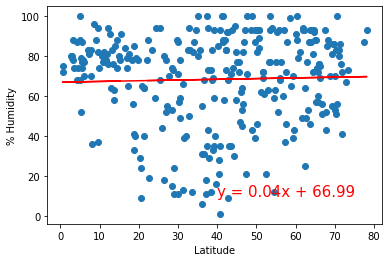

In [292]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Humidity''', '% Humidity',(40,10))

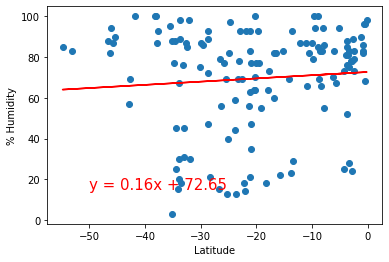

In [293]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-50,15))

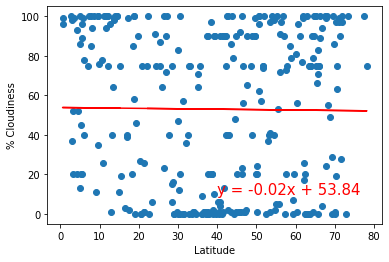

In [294]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(40,10))

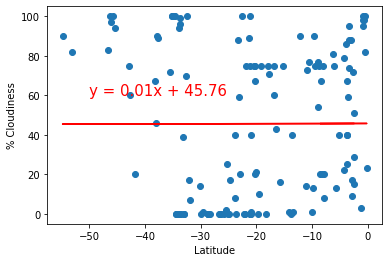

In [295]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,60))

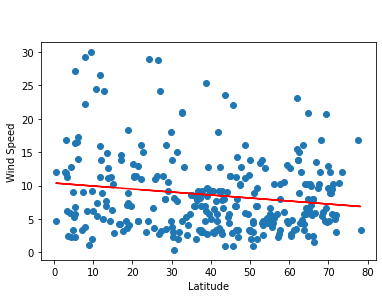

In [296]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(40,35))

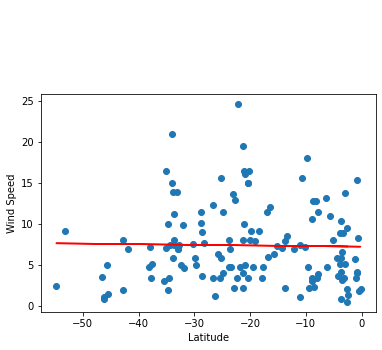

In [297]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,35))